In [1]:
!rm finaldata.csv
!rm finaldata.csv.1
!wget = 'https://raw.githubusercontent.com/Doodies/Github-Stars-Predictor/master/finaldata.csv'

rm: cannot remove 'finaldata.csv.1': No such file or directory
--2018-02-18 13:19:54--  http://=/
Resolving = (=)... failed: Name or service not known.
wget: unable to resolve host address ‘=’
--2018-02-18 13:19:54--  https://raw.githubusercontent.com/Doodies/Github-Stars-Predictor/master/finaldata.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35424703 (34M) [text/plain]
Saving to: ‘finaldata.csv’

finaldata.csv       100%[===================>]  33.78M  42.1MB/s    in 0.8s    

2018-02-18 13:19:55 (42.1 MB/s) - ‘finaldata.csv’ saved [35424703/35424703]

FINISHED --2018-02-18 13:19:55--
Total wall clock time: 0.9s
Downloaded: 1 files, 34M in 0.8s (42.1 MB/s)


In [35]:
!ls

datalab  finaldata.csv


In [0]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Handle table-like data and matrices
import numpy as np
import pandas as pd

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Configure visualisations
%matplotlib inline
color = sns.color_palette()
pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999
# mpl.style.use( 'ggplot' )
sns.set_style( 'whitegrid' )
pylab.rcParams[ 'figure.figsize' ] = 8,6

In [0]:
data = pd.read_csv('finaldata.csv')

In [0]:
def plot_feature(df, col):
    plt.scatter(range(df.shape[0]), np.sort(df[col].values))
    plt.xlabel('index', fontsize=12)
    plt.ylabel(col, fontsize=12)
    plt.show()

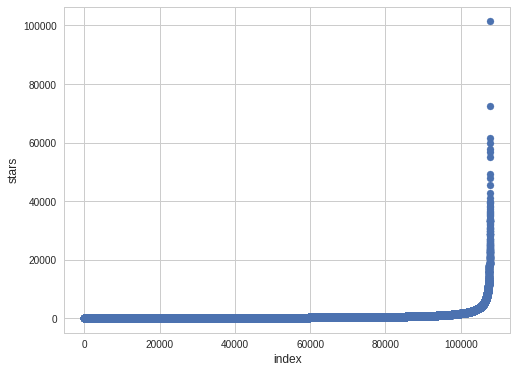

In [39]:
plot_feature(data, "stars")

In [40]:
len(data[data['stars'] > 20000])

122

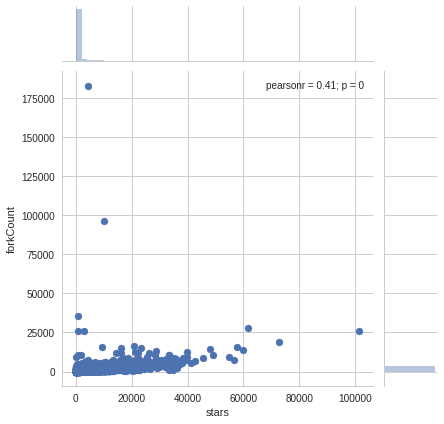

In [41]:
sns.jointplot(x = "stars", y = "forkCount", data = data)

In [42]:
data[data['prMergedComments'] == 0].shape

(31467, 49)

In [43]:


31467 / 107067.0

0.2939000812575303

In [0]:
newDf = data.select_dtypes(include=[np.number])

In [45]:
newDf.head()

,branches,commits,diskUsage,followers,following,forkCount,gistComments,gistStar,gists,iClosedComments,iClosedParticipants,iOpenComments,iOpenParticipants,issuesClosed,issuesOpen,members,organizations,prClosed,prClosedComments,prClosedCommits,prMerged,prMergedComments,prMergedCommits,prOpen,prOpenComments,prOpenCommits,readmeCharCount,readmeLinkCount,readmeSize,readmeWordCount,releases,repositories,stars,subscribersCount,tags
0,1,700.0,132778,9.0,0.0,51,0.0,0.0,1.0,586,252,50,25,109,9,NaN,0.0,9,39,36,67,135,188,0,0,0,5406,18,5406,817,19,1,153,17,19
1,1,141.0,808,1280.0,16.0,52,9.0,31.0,164.0,3,9,4,19,4,10,NaN,1.0,4,7,8,7,8,11,0,0,0,912,9,917,134,0,113,154,42,0
2,1,95.0,3742,404.0,44.0,29,4.0,7.0,92.0,2,4,13,6,2,4,NaN,3.0,0,0,0,2,0,7,1,0,29,5918,19,5918,882,0,125,190,14,0
3,1,100.0,2260,248.0,713.0,23,0.0,0.0,33.0,25,21,33,12,10,5,NaN,2.0,0,0,0,2,8,3,0,0,0,12409,12,12409,1640,0,136,211,12,2
4,3,96.0,131,22.0,39.0,91,0.0,2.0,8.0,45,48,27,38,19,20,NaN,0.0,5,10,58,21,13,26,7,19,23,2014,2,2014,210,0,43,218,13,2


In [0]:
cols  = newDf.columns
zero_rows = []
zero_per = []
for i in cols:
  zero_rows.append(newDf[newDf[i] == 0].shape[0])
  zero_per.append(newDf[newDf[i] == 0].shape[0] * 100 / float(data.shape[0]))

In [0]:
df = pd.DataFrame({'col':cols,'numberRows':zero_rows,'zero_per':zero_per})

In [48]:
df

,col,numberRows,zero_per
0,branches,21,0.019486
1,commits,0,0.000000
2,diskUsage,99,0.091865
3,followers,74,0.068667
4,following,13424,12.456503
5,forkCount,309,0.286730
6,gistComments,41017,38.060816
7,gistStar,35982,33.388700
8,gists,18622,17.279872
9,iClosedComments,15236,14.137909


In [49]:
df.sort_values(['numberRows'], ascending=False)

,col,numberRows,zero_per
30,releases,73496,68.198985
24,prOpenComments,69482,64.474282
25,prOpenCommits,52025,48.275446
23,prOpen,52025,48.275446
34,tags,45413,42.139987
18,prClosedComments,44057,40.881717
6,gistComments,41017,38.060816
16,organizations,40733,37.797285
19,prClosedCommits,37404,34.708213
17,prClosed,37310,34.620988


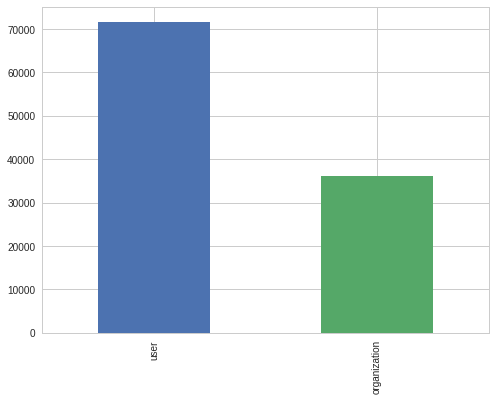

In [50]:
data.type.value_counts()
data.type.value_counts().plot.bar()

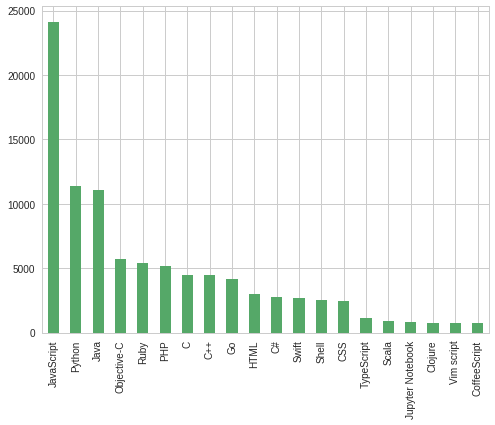

In [51]:
data.primaryLanguage.value_counts()[:20].plot(kind = 'bar', color = color[1])

In [52]:
data.head()

,branches,commits,createdAt,description,diskUsage,followers,following,forkCount,gistComments,gistStar,gists,hasWikiEnabled,iClosedComments,iClosedParticipants,iOpenComments,iOpenParticipants,isArchived,issuesClosed,issuesOpen,license,location,login,members,organizations,prClosed,prClosedComments,prClosedCommits,prMerged,prMergedComments,prMergedCommits,prOpen,prOpenComments,prOpenCommits,primaryLanguage,pushedAt,readmeCharCount,readmeLinkCount,readmeSize,readmeWordCount,releases,reponame,repositories,siteAdmin,stars,subscribersCount,tags,type,updatedAt,websiteUrl
0,1,700.0,2014-12-13T08:36:53Z,openScale is an open source app which support ...,132778,9.0,0.0,51,0.0,0.0,1.0,True,586,252,50,25,False,109,9,GNU General Public License v3.0,Germany,oliexdev,NaN,0.0,9,39,36,67,135,188,0,0,0,Java,2018-02-16T15:32:06Z,5406,18,5406,817,19,openScale,1,False,153,17,19,user,2018-02-14T21:05:31Z,NaN
1,1,141.0,2014-12-13T16:41:47Z,:book: Arquivos do livro Be MEAN,808,1280.0,16.0,52,9.0,31.0,164.0,True,3,9,4,19,False,4,10,NaN,NaN,ericdouglas,NaN,1.0,4,7,8,7,8,11,0,0,0,JavaScript,2015-10-26T20:58:23Z,912,9,917,134,0,be-MEAN-resources,113,False,154,42,0,user,2018-01-25T22:23:46Z,NaN
2,1,95.0,2014-12-13T04:46:00Z,Automated message queue orchestration for scal...,3742,404.0,44.0,29,4.0,7.0,92.0,True,2,4,13,6,False,2,4,Apache License 2.0,"Podunk, Iowa",tylertreat,NaN,3.0,0,0,0,2,0,7,1,0,29,Go,2016-01-23T17:38:54Z,5918,19,5918,882,0,Flotilla,125,False,190,14,0,user,2018-02-02T02:41:14Z,https://bravenewgeek.com
3,1,100.0,2014-12-13T19:21:02Z,node.js interface to the Google word2vec tool,2260,248.0,713.0,23,0.0,0.0,33.0,True,25,21,33,12,False,10,5,Apache License 2.0,"Pittsburgh, PA",Planeshifter,NaN,2.0,0,0,0,2,8,3,0,0,0,C,2017-08-29T14:54:26Z,12409,12,12409,1640,0,node-word2vec,136,False,211,12,2,user,2018-02-05T14:48:47Z,philipp-burckhardt.com
4,3,96.0,2014-12-13T10:50:11Z,Webcam component,131,22.0,39.0,91,0.0,2.0,8.0,True,45,48,27,38,False,19,20,NaN,"Southampton, England",mozmorris,NaN,0.0,5,10,58,21,13,26,7,19,23,JavaScript,2018-01-14T18:10:13Z,2014,2,2014,210,0,react-webcam,43,False,218,13,2,user,2018-02-14T12:35:31Z,http://mozmorris.com/


# changing the time to their hours representation

In [0]:
time_columns = ['createdAt','updatedAt','pushedAt']
for i in time_columns:
  data[i] =  data[i].apply(lambda x : x.replace('T',' ').replace('Z',''))

In [0]:
from datetime import datetime

for i in time_columns:
  data[i] = data[i].apply(lambda x: int(datetime.strptime(x,'%Y-%m-%d %H:%M:%S').strftime('%s')) / (60 * 60))

In [55]:
data.loc[:, time_columns]

,createdAt,updatedAt,pushedAt
0,394016,421845,421887
1,394024,421366,401636
2,394012,421538,403769
3,394027,421622,417782
4,394018,421836,421098
5,394011,421246,417400
6,394011,421177,400540
7,394024,421818,421737
8,394011,421707,416834
9,394029,421818,405495


In [56]:
data.head()

,branches,commits,createdAt,description,diskUsage,followers,following,forkCount,gistComments,gistStar,gists,hasWikiEnabled,iClosedComments,iClosedParticipants,iOpenComments,iOpenParticipants,isArchived,issuesClosed,issuesOpen,license,location,login,members,organizations,prClosed,prClosedComments,prClosedCommits,prMerged,prMergedComments,prMergedCommits,prOpen,prOpenComments,prOpenCommits,primaryLanguage,pushedAt,readmeCharCount,readmeLinkCount,readmeSize,readmeWordCount,releases,reponame,repositories,siteAdmin,stars,subscribersCount,tags,type,updatedAt,websiteUrl
0,1,700.0,394016,openScale is an open source app which support ...,132778,9.0,0.0,51,0.0,0.0,1.0,True,586,252,50,25,False,109,9,GNU General Public License v3.0,Germany,oliexdev,NaN,0.0,9,39,36,67,135,188,0,0,0,Java,421887,5406,18,5406,817,19,openScale,1,False,153,17,19,user,421845,NaN
1,1,141.0,394024,:book: Arquivos do livro Be MEAN,808,1280.0,16.0,52,9.0,31.0,164.0,True,3,9,4,19,False,4,10,NaN,NaN,ericdouglas,NaN,1.0,4,7,8,7,8,11,0,0,0,JavaScript,401636,912,9,917,134,0,be-MEAN-resources,113,False,154,42,0,user,421366,NaN
2,1,95.0,394012,Automated message queue orchestration for scal...,3742,404.0,44.0,29,4.0,7.0,92.0,True,2,4,13,6,False,2,4,Apache License 2.0,"Podunk, Iowa",tylertreat,NaN,3.0,0,0,0,2,0,7,1,0,29,Go,403769,5918,19,5918,882,0,Flotilla,125,False,190,14,0,user,421538,https://bravenewgeek.com
3,1,100.0,394027,node.js interface to the Google word2vec tool,2260,248.0,713.0,23,0.0,0.0,33.0,True,25,21,33,12,False,10,5,Apache License 2.0,"Pittsburgh, PA",Planeshifter,NaN,2.0,0,0,0,2,8,3,0,0,0,C,417782,12409,12,12409,1640,0,node-word2vec,136,False,211,12,2,user,421622,philipp-burckhardt.com
4,3,96.0,394018,Webcam component,131,22.0,39.0,91,0.0,2.0,8.0,True,45,48,27,38,False,19,20,NaN,"Southampton, England",mozmorris,NaN,0.0,5,10,58,21,13,26,7,19,23,JavaScript,421098,2014,2,2014,210,0,react-webcam,43,False,218,13,2,user,421836,http://mozmorris.com/


# website url to binary form 1(yes) / 0(no)

In [0]:
data['websiteUrl'] = data['websiteUrl'].fillna('')

In [0]:
data['websiteUrl'] = data['websiteUrl'].apply(lambda x : 1 if len(x) > 0 else 0)

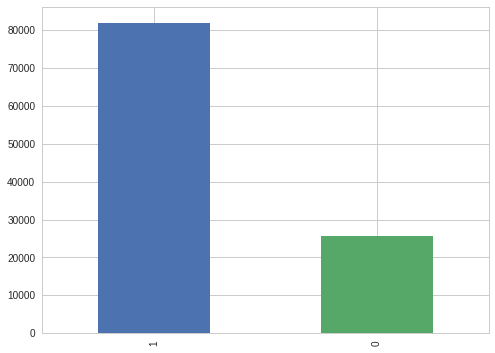

In [59]:
data['websiteUrl'].value_counts().plot.bar()

In [60]:
data.head()

,branches,commits,createdAt,description,diskUsage,followers,following,forkCount,gistComments,gistStar,gists,hasWikiEnabled,iClosedComments,iClosedParticipants,iOpenComments,iOpenParticipants,isArchived,issuesClosed,issuesOpen,license,location,login,members,organizations,prClosed,prClosedComments,prClosedCommits,prMerged,prMergedComments,prMergedCommits,prOpen,prOpenComments,prOpenCommits,primaryLanguage,pushedAt,readmeCharCount,readmeLinkCount,readmeSize,readmeWordCount,releases,reponame,repositories,siteAdmin,stars,subscribersCount,tags,type,updatedAt,websiteUrl
0,1,700.0,394016,openScale is an open source app which support ...,132778,9.0,0.0,51,0.0,0.0,1.0,True,586,252,50,25,False,109,9,GNU General Public License v3.0,Germany,oliexdev,NaN,0.0,9,39,36,67,135,188,0,0,0,Java,421887,5406,18,5406,817,19,openScale,1,False,153,17,19,user,421845,0
1,1,141.0,394024,:book: Arquivos do livro Be MEAN,808,1280.0,16.0,52,9.0,31.0,164.0,True,3,9,4,19,False,4,10,NaN,NaN,ericdouglas,NaN,1.0,4,7,8,7,8,11,0,0,0,JavaScript,401636,912,9,917,134,0,be-MEAN-resources,113,False,154,42,0,user,421366,0
2,1,95.0,394012,Automated message queue orchestration for scal...,3742,404.0,44.0,29,4.0,7.0,92.0,True,2,4,13,6,False,2,4,Apache License 2.0,"Podunk, Iowa",tylertreat,NaN,3.0,0,0,0,2,0,7,1,0,29,Go,403769,5918,19,5918,882,0,Flotilla,125,False,190,14,0,user,421538,1
3,1,100.0,394027,node.js interface to the Google word2vec tool,2260,248.0,713.0,23,0.0,0.0,33.0,True,25,21,33,12,False,10,5,Apache License 2.0,"Pittsburgh, PA",Planeshifter,NaN,2.0,0,0,0,2,8,3,0,0,0,C,417782,12409,12,12409,1640,0,node-word2vec,136,False,211,12,2,user,421622,1
4,3,96.0,394018,Webcam component,131,22.0,39.0,91,0.0,2.0,8.0,True,45,48,27,38,False,19,20,NaN,"Southampton, England",mozmorris,NaN,0.0,5,10,58,21,13,26,7,19,23,JavaScript,421098,2014,2,2014,210,0,react-webcam,43,False,218,13,2,user,421836,1


In [0]:
data['description'] = data['description'].fillna('') 

# **description Word and character count**

In [0]:
data['desWordCount'] = data['description'].apply(lambda x: len(x.split(' ')))
data['desCharCount'] = data['description'].apply(len)

In [63]:
data.head()

,branches,commits,createdAt,description,diskUsage,followers,following,forkCount,gistComments,gistStar,gists,hasWikiEnabled,iClosedComments,iClosedParticipants,iOpenComments,iOpenParticipants,isArchived,issuesClosed,issuesOpen,license,location,login,members,organizations,prClosed,prClosedComments,prClosedCommits,prMerged,prMergedComments,prMergedCommits,prOpen,prOpenComments,prOpenCommits,primaryLanguage,pushedAt,readmeCharCount,readmeLinkCount,readmeSize,readmeWordCount,releases,reponame,repositories,siteAdmin,stars,subscribersCount,tags,type,updatedAt,websiteUrl,desWordCount,desCharCount
0,1,700.0,394016,openScale is an open source app which support ...,132778,9.0,0.0,51,0.0,0.0,1.0,True,586,252,50,25,False,109,9,GNU General Public License v3.0,Germany,oliexdev,NaN,0.0,9,39,36,67,135,188,0,0,0,Java,421887,5406,18,5406,817,19,openScale,1,False,153,17,19,user,421845,0,18,104
1,1,141.0,394024,:book: Arquivos do livro Be MEAN,808,1280.0,16.0,52,9.0,31.0,164.0,True,3,9,4,19,False,4,10,NaN,NaN,ericdouglas,NaN,1.0,4,7,8,7,8,11,0,0,0,JavaScript,401636,912,9,917,134,0,be-MEAN-resources,113,False,154,42,0,user,421366,0,6,32
2,1,95.0,394012,Automated message queue orchestration for scal...,3742,404.0,44.0,29,4.0,7.0,92.0,True,2,4,13,6,False,2,4,Apache License 2.0,"Podunk, Iowa",tylertreat,NaN,3.0,0,0,0,2,0,7,1,0,29,Go,403769,5918,19,5918,882,0,Flotilla,125,False,190,14,0,user,421538,1,7,65
3,1,100.0,394027,node.js interface to the Google word2vec tool,2260,248.0,713.0,23,0.0,0.0,33.0,True,25,21,33,12,False,10,5,Apache License 2.0,"Pittsburgh, PA",Planeshifter,NaN,2.0,0,0,0,2,8,3,0,0,0,C,417782,12409,12,12409,1640,0,node-word2vec,136,False,211,12,2,user,421622,1,7,45
4,3,96.0,394018,Webcam component,131,22.0,39.0,91,0.0,2.0,8.0,True,45,48,27,38,False,19,20,NaN,"Southampton, England",mozmorris,NaN,0.0,5,10,58,21,13,26,7,19,23,JavaScript,421098,2014,2,2014,210,0,react-webcam,43,False,218,13,2,user,421836,1,2,16


True     90907
False    16860
Name: hasWikiEnabled, dtype: int64


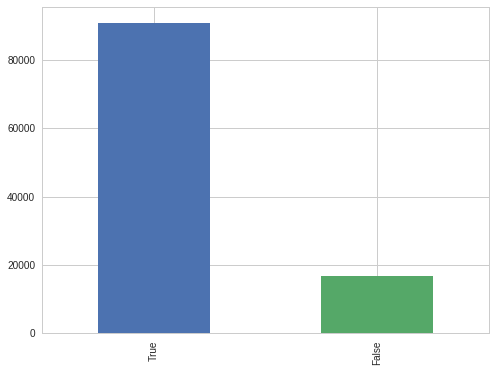

In [64]:
print(data['hasWikiEnabled'].value_counts())
data['hasWikiEnabled'].value_counts().plot.bar()

# hasWikiEnabled to binary form

In [0]:
data['hasWikiEnabled'] = data['hasWikiEnabled'].apply(lambda x : 1 if x else 0)

# license to one hot encoding

In [66]:
set(data['license'])

{nan,
 'Academic Free License v3.0',
 'Apache License 2.0',
 'Artistic License 2.0',
 'BSD 2-Clause "Simplified" License',
 'BSD 3-Clause "New" or "Revised" License',
 'BSD 3-Clause Clear License',
 'Boost Software License 1.0',
 'Creative Commons Attribution 4.0',
 'Creative Commons Attribution Share Alike 4.0',
 'Creative Commons Zero v1.0 Universal',
 'Do What The F*ck You Want To Public License',
 'Eclipse Public License 1.0',
 'Educational Community License v2.0',
 'European Union Public License 1.1',
 'GNU Affero General Public License v3.0',
 'GNU General Public License v2.0',
 'GNU General Public License v3.0',
 'GNU Lesser General Public License v2.1',
 'GNU Lesser General Public License v3.0',
 'ISC License',
 'LaTeX Project Public License v1.3c',
 'MIT License',
 'Microsoft Public License',
 'Microsoft Reciprocal License',
 'Mozilla Public License 2.0',
 'Open Software License 3.0',
 'Other',
 'SIL Open Font License 1.1',
 'The Unlicense',
 'zlib License'}

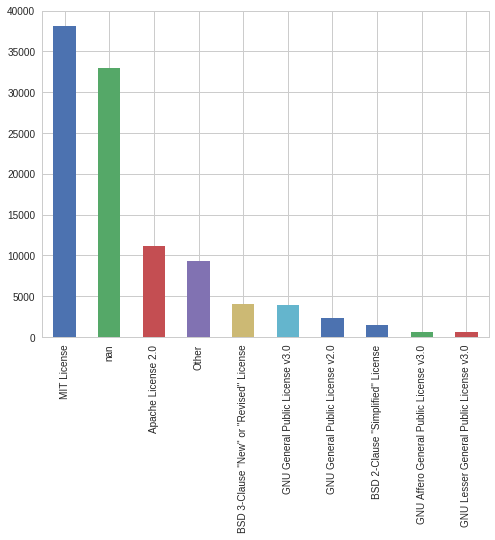

In [67]:
data['license'].value_counts(dropna = False)[:10].plot.bar()

In [0]:
data['license'] = data['license'].fillna('')

In [0]:
license_cols = ['mit_license','nan_license','apache_license','other_license','remain_license'] 

In [0]:
for i in license_cols:
  if i.startswith('mit'):
    data[i] = data['license'].apply(lambda x: 1 if x == 'MIT License' else 0)
  elif i.startswith('nan'):
    data[i] = data['license'].apply(lambda x: int(len(x) == 0))
  elif i.startswith('apache'):
    data[i] = data['license'].apply(lambda x: 1 if x == 'Apache License 2.0' else 0)
  elif i.startswith('other'):
    data[i] = data['license'].apply(lambda x: 1 if x == 'Other' else 0)    


In [0]:
data['remain_license'] = (data[license_cols[:-1]].sum(axis=1) == 0).astype(int)

In [72]:
data.head()

,branches,commits,createdAt,description,diskUsage,followers,following,forkCount,gistComments,gistStar,gists,hasWikiEnabled,iClosedComments,iClosedParticipants,iOpenComments,iOpenParticipants,isArchived,issuesClosed,issuesOpen,license,location,login,members,organizations,prClosed,prClosedComments,prClosedCommits,prMerged,prMergedComments,prMergedCommits,prOpen,prOpenComments,prOpenCommits,primaryLanguage,pushedAt,readmeCharCount,readmeLinkCount,readmeSize,readmeWordCount,releases,reponame,repositories,siteAdmin,stars,subscribersCount,tags,type,updatedAt,websiteUrl,desWordCount,desCharCount,mit_license,nan_license,apache_license,other_license,remain_license
0,1,700.0,394016,openScale is an open source app which support ...,132778,9.0,0.0,51,0.0,0.0,1.0,1,586,252,50,25,False,109,9,GNU General Public License v3.0,Germany,oliexdev,NaN,0.0,9,39,36,67,135,188,0,0,0,Java,421887,5406,18,5406,817,19,openScale,1,False,153,17,19,user,421845,0,18,104,0,0,0,0,1
1,1,141.0,394024,:book: Arquivos do livro Be MEAN,808,1280.0,16.0,52,9.0,31.0,164.0,1,3,9,4,19,False,4,10,,NaN,ericdouglas,NaN,1.0,4,7,8,7,8,11,0,0,0,JavaScript,401636,912,9,917,134,0,be-MEAN-resources,113,False,154,42,0,user,421366,0,6,32,0,1,0,0,0
2,1,95.0,394012,Automated message queue orchestration for scal...,3742,404.0,44.0,29,4.0,7.0,92.0,1,2,4,13,6,False,2,4,Apache License 2.0,"Podunk, Iowa",tylertreat,NaN,3.0,0,0,0,2,0,7,1,0,29,Go,403769,5918,19,5918,882,0,Flotilla,125,False,190,14,0,user,421538,1,7,65,0,0,1,0,0
3,1,100.0,394027,node.js interface to the Google word2vec tool,2260,248.0,713.0,23,0.0,0.0,33.0,1,25,21,33,12,False,10,5,Apache License 2.0,"Pittsburgh, PA",Planeshifter,NaN,2.0,0,0,0,2,8,3,0,0,0,C,417782,12409,12,12409,1640,0,node-word2vec,136,False,211,12,2,user,421622,1,7,45,0,0,1,0,0
4,3,96.0,394018,Webcam component,131,22.0,39.0,91,0.0,2.0,8.0,1,45,48,27,38,False,19,20,,"Southampton, England",mozmorris,NaN,0.0,5,10,58,21,13,26,7,19,23,JavaScript,421098,2014,2,2014,210,0,react-webcam,43,False,218,13,2,user,421836,1,2,16,0,1,0,0,0


# primary language to one hot

In [73]:
data.primaryLanguage.isnull().sum()

5858

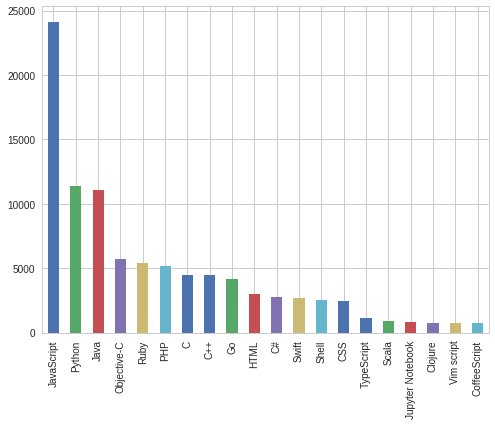

In [74]:
data.primaryLanguage.value_counts()[:20].plot.bar()

In [0]:
lang_cols = np.array(data.primaryLanguage.value_counts()[:6].index)

In [0]:
data[lang_cols[0]] = data.primaryLanguage.apply(lambda x : int(x == 'JavaScript'))                  
data[lang_cols[1]] = data.primaryLanguage.apply(lambda x : int(x == 'Python'))                  
data[lang_cols[2]] = data.primaryLanguage.apply(lambda x : int(x == 'Java'))                  
data[lang_cols[3]] = data.primaryLanguage.apply(lambda x : int(x == 'Objective-C'))                  
data[lang_cols[4]] = data.primaryLanguage.apply(lambda x : int(x == 'Ruby'))                  
data[lang_cols[5]] = data.primaryLanguage.apply(lambda x : int(x == 'PHP'))
data['other_language'] = (data[lang_cols].sum(axis=1) == 0).astype(int)

In [77]:
data.head()

,branches,commits,createdAt,description,diskUsage,followers,following,forkCount,gistComments,gistStar,gists,hasWikiEnabled,iClosedComments,iClosedParticipants,iOpenComments,iOpenParticipants,isArchived,issuesClosed,issuesOpen,license,location,login,members,organizations,prClosed,prClosedComments,prClosedCommits,prMerged,prMergedComments,prMergedCommits,prOpen,prOpenComments,prOpenCommits,primaryLanguage,pushedAt,readmeCharCount,readmeLinkCount,readmeSize,readmeWordCount,releases,reponame,repositories,siteAdmin,stars,subscribersCount,tags,type,updatedAt,websiteUrl,desWordCount,desCharCount,mit_license,nan_license,apache_license,other_license,remain_license,JavaScript,Python,Java,Objective-C,Ruby,PHP,other_language
0,1,700.0,394016,openScale is an open source app which support ...,132778,9.0,0.0,51,0.0,0.0,1.0,1,586,252,50,25,False,109,9,GNU General Public License v3.0,Germany,oliexdev,NaN,0.0,9,39,36,67,135,188,0,0,0,Java,421887,5406,18,5406,817,19,openScale,1,False,153,17,19,user,421845,0,18,104,0,0,0,0,1,0,0,1,0,0,0,0
1,1,141.0,394024,:book: Arquivos do livro Be MEAN,808,1280.0,16.0,52,9.0,31.0,164.0,1,3,9,4,19,False,4,10,,NaN,ericdouglas,NaN,1.0,4,7,8,7,8,11,0,0,0,JavaScript,401636,912,9,917,134,0,be-MEAN-resources,113,False,154,42,0,user,421366,0,6,32,0,1,0,0,0,1,0,0,0,0,0,0
2,1,95.0,394012,Automated message queue orchestration for scal...,3742,404.0,44.0,29,4.0,7.0,92.0,1,2,4,13,6,False,2,4,Apache License 2.0,"Podunk, Iowa",tylertreat,NaN,3.0,0,0,0,2,0,7,1,0,29,Go,403769,5918,19,5918,882,0,Flotilla,125,False,190,14,0,user,421538,1,7,65,0,0,1,0,0,0,0,0,0,0,0,1
3,1,100.0,394027,node.js interface to the Google word2vec tool,2260,248.0,713.0,23,0.0,0.0,33.0,1,25,21,33,12,False,10,5,Apache License 2.0,"Pittsburgh, PA",Planeshifter,NaN,2.0,0,0,0,2,8,3,0,0,0,C,417782,12409,12,12409,1640,0,node-word2vec,136,False,211,12,2,user,421622,1,7,45,0,0,1,0,0,0,0,0,0,0,0,1
4,3,96.0,394018,Webcam component,131,22.0,39.0,91,0.0,2.0,8.0,1,45,48,27,38,False,19,20,,"Southampton, England",mozmorris,NaN,0.0,5,10,58,21,13,26,7,19,23,JavaScript,421098,2014,2,2014,210,0,react-webcam,43,False,218,13,2,user,421836,1,2,16,0,1,0,0,0,1,0,0,0,0,0,0


# type to binary 1(user) / 0(org)

In [0]:
newDf = data

In [0]:
data['type'] = data.type.apply(lambda x : 1 if x == 'user' else 0)

In [80]:
data.members.isnull().sum()

71601

In [81]:
data.type.value_counts()

1    71601
0    36166
Name: type, dtype: int64

In [82]:
data.head()

,branches,commits,createdAt,description,diskUsage,followers,following,forkCount,gistComments,gistStar,gists,hasWikiEnabled,iClosedComments,iClosedParticipants,iOpenComments,iOpenParticipants,isArchived,issuesClosed,issuesOpen,license,location,login,members,organizations,prClosed,prClosedComments,prClosedCommits,prMerged,prMergedComments,prMergedCommits,prOpen,prOpenComments,prOpenCommits,primaryLanguage,pushedAt,readmeCharCount,readmeLinkCount,readmeSize,readmeWordCount,releases,reponame,repositories,siteAdmin,stars,subscribersCount,tags,type,updatedAt,websiteUrl,desWordCount,desCharCount,mit_license,nan_license,apache_license,other_license,remain_license,JavaScript,Python,Java,Objective-C,Ruby,PHP,other_language
0,1,700.0,394016,openScale is an open source app which support ...,132778,9.0,0.0,51,0.0,0.0,1.0,1,586,252,50,25,False,109,9,GNU General Public License v3.0,Germany,oliexdev,NaN,0.0,9,39,36,67,135,188,0,0,0,Java,421887,5406,18,5406,817,19,openScale,1,False,153,17,19,1,421845,0,18,104,0,0,0,0,1,0,0,1,0,0,0,0
1,1,141.0,394024,:book: Arquivos do livro Be MEAN,808,1280.0,16.0,52,9.0,31.0,164.0,1,3,9,4,19,False,4,10,,NaN,ericdouglas,NaN,1.0,4,7,8,7,8,11,0,0,0,JavaScript,401636,912,9,917,134,0,be-MEAN-resources,113,False,154,42,0,1,421366,0,6,32,0,1,0,0,0,1,0,0,0,0,0,0
2,1,95.0,394012,Automated message queue orchestration for scal...,3742,404.0,44.0,29,4.0,7.0,92.0,1,2,4,13,6,False,2,4,Apache License 2.0,"Podunk, Iowa",tylertreat,NaN,3.0,0,0,0,2,0,7,1,0,29,Go,403769,5918,19,5918,882,0,Flotilla,125,False,190,14,0,1,421538,1,7,65,0,0,1,0,0,0,0,0,0,0,0,1
3,1,100.0,394027,node.js interface to the Google word2vec tool,2260,248.0,713.0,23,0.0,0.0,33.0,1,25,21,33,12,False,10,5,Apache License 2.0,"Pittsburgh, PA",Planeshifter,NaN,2.0,0,0,0,2,8,3,0,0,0,C,417782,12409,12,12409,1640,0,node-word2vec,136,False,211,12,2,1,421622,1,7,45,0,0,1,0,0,0,0,0,0,0,0,1
4,3,96.0,394018,Webcam component,131,22.0,39.0,91,0.0,2.0,8.0,1,45,48,27,38,False,19,20,,"Southampton, England",mozmorris,NaN,0.0,5,10,58,21,13,26,7,19,23,JavaScript,421098,2014,2,2014,210,0,react-webcam,43,False,218,13,2,1,421836,1,2,16,0,1,0,0,0,1,0,0,0,0,0,0


# setting nan members to 0

In [0]:
data['members'] = data['members'].fillna(0)

In [84]:
data.isnull().sum()

branches                   0
commits                 1650
createdAt                  0
description                0
diskUsage                  0
followers              36166
following              36166
forkCount                  0
gistComments           36166
gistStar               36166
gists                  36166
hasWikiEnabled             0
iClosedComments            0
iClosedParticipants        0
iOpenComments              0
iOpenParticipants          0
isArchived                 0
issuesClosed               0
issuesOpen                 0
license                    0
location               32080
login                      0
members                    0
organizations          36166
prClosed                   0
prClosedComments           0
prClosedCommits            0
prMerged                   0
prMergedComments           0
prMergedCommits            0
                       ...  
primaryLanguage         5858
pushedAt                   0
readmeCharCount            0
readmeLinkCoun

In [0]:
def plot_missing_data(df):
    missing_df = df.isnull().sum(axis=0).reset_index()
    missing_df.columns = ['column_name', 'missing_count']
    missing_df = missing_df.loc[missing_df['missing_count']>0]
    missing_df = missing_df.sort_values(by='missing_count')

    ind = np.arange(missing_df.shape[0])
    width = 0.9
    fig, ax = plt.subplots(figsize=(12,9))
    rects = ax.barh(ind, missing_df.missing_count.values, color=color[3])
    ax.set_yticks(ind)
    ax.set_yticklabels(missing_df.column_name.values, rotation='horizontal')
    ax.set_xlabel("Count of missing values")
    ax.set_title("Number of missing values in each column")
    plt.show()

# changing NAN to 0 for the following

In [0]:
data['organizations'] = data['organizations'].fillna(0)
data['gists'] = data['gists'].fillna(0)
data['gistStar'] = data['gistStar'].fillna(0)
data['gistComments'] = data['gistComments'].fillna(0)
data['following'] = data['following'].fillna(0)
data['followers'] = data['followers'].fillna(0)

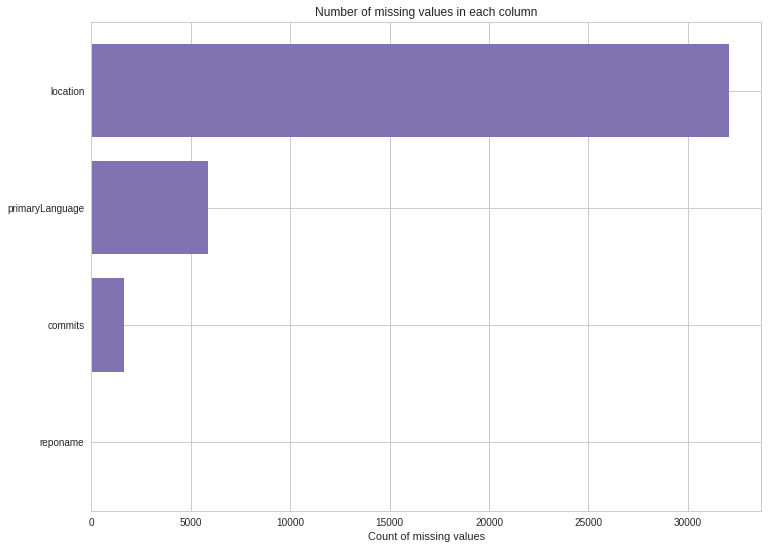

In [87]:
plot_missing_data(data)

# removing the null numCommits(of master branch) rows

In [88]:
data.commits.isnull().sum()

1650

In [0]:
data = data[data.commits.notnull()]

In [90]:
data.shape

(106117, 63)

In [91]:
data.commits.isnull().sum()

0

# removing the null repo name rows

In [92]:
print(data.reponame.isnull().sum())
data.shape

2


(106117, 63)

In [0]:
data = data[data.reponame.notnull()]

In [94]:
print(data.reponame.isnull().sum())
data.shape

0


(106115, 63)

In [95]:
data.head()

,branches,commits,createdAt,description,diskUsage,followers,following,forkCount,gistComments,gistStar,gists,hasWikiEnabled,iClosedComments,iClosedParticipants,iOpenComments,iOpenParticipants,isArchived,issuesClosed,issuesOpen,license,location,login,members,organizations,prClosed,prClosedComments,prClosedCommits,prMerged,prMergedComments,prMergedCommits,prOpen,prOpenComments,prOpenCommits,primaryLanguage,pushedAt,readmeCharCount,readmeLinkCount,readmeSize,readmeWordCount,releases,reponame,repositories,siteAdmin,stars,subscribersCount,tags,type,updatedAt,websiteUrl,desWordCount,desCharCount,mit_license,nan_license,apache_license,other_license,remain_license,JavaScript,Python,Java,Objective-C,Ruby,PHP,other_language
0,1,700.0,394016,openScale is an open source app which support ...,132778,9.0,0.0,51,0.0,0.0,1.0,1,586,252,50,25,False,109,9,GNU General Public License v3.0,Germany,oliexdev,0.0,0.0,9,39,36,67,135,188,0,0,0,Java,421887,5406,18,5406,817,19,openScale,1,False,153,17,19,1,421845,0,18,104,0,0,0,0,1,0,0,1,0,0,0,0
1,1,141.0,394024,:book: Arquivos do livro Be MEAN,808,1280.0,16.0,52,9.0,31.0,164.0,1,3,9,4,19,False,4,10,,NaN,ericdouglas,0.0,1.0,4,7,8,7,8,11,0,0,0,JavaScript,401636,912,9,917,134,0,be-MEAN-resources,113,False,154,42,0,1,421366,0,6,32,0,1,0,0,0,1,0,0,0,0,0,0
2,1,95.0,394012,Automated message queue orchestration for scal...,3742,404.0,44.0,29,4.0,7.0,92.0,1,2,4,13,6,False,2,4,Apache License 2.0,"Podunk, Iowa",tylertreat,0.0,3.0,0,0,0,2,0,7,1,0,29,Go,403769,5918,19,5918,882,0,Flotilla,125,False,190,14,0,1,421538,1,7,65,0,0,1,0,0,0,0,0,0,0,0,1
3,1,100.0,394027,node.js interface to the Google word2vec tool,2260,248.0,713.0,23,0.0,0.0,33.0,1,25,21,33,12,False,10,5,Apache License 2.0,"Pittsburgh, PA",Planeshifter,0.0,2.0,0,0,0,2,8,3,0,0,0,C,417782,12409,12,12409,1640,0,node-word2vec,136,False,211,12,2,1,421622,1,7,45,0,0,1,0,0,0,0,0,0,0,0,1
4,3,96.0,394018,Webcam component,131,22.0,39.0,91,0.0,2.0,8.0,1,45,48,27,38,False,19,20,,"Southampton, England",mozmorris,0.0,0.0,5,10,58,21,13,26,7,19,23,JavaScript,421098,2014,2,2014,210,0,react-webcam,43,False,218,13,2,1,421836,1,2,16,0,1,0,0,0,1,0,0,0,0,0,0


In [96]:
data.select_dtypes(include = np.bool)

,isArchived,siteAdmin
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


# removing isArchived and site admin columns

In [97]:
data['isArchived'].value_counts()

False    105398
True        717
Name: isArchived, dtype: int64

In [98]:
data['siteAdmin'].value_counts()

False    105821
True        294
Name: siteAdmin, dtype: int64

In [99]:
data.columns

Index([u'branches', u'commits', u'createdAt', u'description', u'diskUsage',
       u'followers', u'following', u'forkCount', u'gistComments', u'gistStar',
       u'gists', u'hasWikiEnabled', u'iClosedComments', u'iClosedParticipants',
       u'iOpenComments', u'iOpenParticipants', u'isArchived', u'issuesClosed',
       u'issuesOpen', u'license', u'location', u'login', u'members',
       u'organizations', u'prClosed', u'prClosedComments', u'prClosedCommits',
       u'prMerged', u'prMergedComments', u'prMergedCommits', u'prOpen',
       u'prOpenComments', u'prOpenCommits', u'primaryLanguage', u'pushedAt',
       u'readmeCharCount', u'readmeLinkCount', u'readmeSize',
       u'readmeWordCount', u'releases', u'reponame', u'repositories',
       u'siteAdmin', u'stars', u'subscribersCount', u'tags', u'type',
       u'updatedAt', u'websiteUrl', u'desWordCount', u'desCharCount',
       u'mit_license', u'nan_license', u'apache_license', u'other_license',
       u'remain_license', u'JavaScript', 

In [0]:
## Columns to drop
Df = data
col = ['description' , 'isArchived' , 'license' ,'location' , 'login' , 'primaryLanguage' , 'reponame' , 'siteAdmin']
data = data.drop(col , axis = 1)

In [0]:
def count_dtypes(df):
    pd.options.display.max_rows = 65
    dtype_df = df.dtypes.reset_index()
    dtype_df.columns = ["Count", "Column Type"]
    return dtype_df.groupby("Column Type").aggregate('count').reset_index()

In [102]:
count_dtypes(data)

,Column Type,Count
0,int64,47
1,float64,8


In [103]:
data.head(2)

,branches,commits,createdAt,diskUsage,followers,following,forkCount,gistComments,gistStar,gists,hasWikiEnabled,iClosedComments,iClosedParticipants,iOpenComments,iOpenParticipants,issuesClosed,issuesOpen,members,organizations,prClosed,prClosedComments,prClosedCommits,prMerged,prMergedComments,prMergedCommits,prOpen,prOpenComments,prOpenCommits,pushedAt,readmeCharCount,readmeLinkCount,readmeSize,readmeWordCount,releases,repositories,stars,subscribersCount,tags,type,updatedAt,websiteUrl,desWordCount,desCharCount,mit_license,nan_license,apache_license,other_license,remain_license,JavaScript,Python,Java,Objective-C,Ruby,PHP,other_language
0,1,700.0,394016,132778,9.0,0.0,51,0.0,0.0,1.0,1,586,252,50,25,109,9,0.0,0.0,9,39,36,67,135,188,0,0,0,421887,5406,18,5406,817,19,1,153,17,19,1,421845,0,18,104,0,0,0,0,1,0,0,1,0,0,0,0
1,1,141.0,394024,808,1280.0,16.0,52,9.0,31.0,164.0,1,3,9,4,19,4,10,0.0,1.0,4,7,8,7,8,11,0,0,0,401636,912,9,917,134,0,113,154,42,0,1,421366,0,6,32,0,1,0,0,0,1,0,0,0,0,0,0


In [0]:
X = data.drop(['stars'] , axis =1)
Y = data.stars

In [0]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
X = s.fit_transform(X)

In [106]:
X

array([[-0.09745647,  0.00614558,  0.23250482, ..., -0.23044367,
        -0.22388323, -0.84232977],
       [-0.09745647, -0.08776201,  0.23293463, ..., -0.23044367,
        -0.22388323, -0.84232977],
       [-0.09745647, -0.09548965,  0.23228991, ..., -0.23044367,
        -0.22388323,  1.1871835 ],
       ...,
       [ 0.00197165, -0.0922978 ,  0.23218246, ..., -0.23044367,
        -0.22388323,  1.1871835 ],
       [-0.07259944, -0.11128091,  0.23223618, ..., -0.23044367,
        -0.22388323,  1.1871835 ],
       [-0.09745647, -0.10741709,  0.23304208, ..., -0.23044367,
        -0.22388323,  1.1871835 ]])

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

# gradient boost

In [123]:
from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor(verbose = 1)
reg.fit(X_train , y_train)
print(reg.score(X_train, y_train))
reg.score(X_test, y_test)

      Iter       Train Loss   Remaining Time 
         1     2360314.1265           22.53s
         2     2074469.1673           22.19s
         3     1836205.1469           22.25s
         4     1638331.9862           22.22s
         5     1467911.6259           21.83s
         6     1329086.0858           21.74s
         7     1208981.9030           21.42s
         8     1113993.2064           21.17s
         9     1029045.8079           20.83s
        10      958567.9627           20.48s
        20      602582.8212           18.70s
        30      498356.7437           16.57s
        40      452840.1770           14.34s
        50      421269.7745           12.11s
        60      397800.7554            9.76s
        70      381910.7280            7.42s
        80      370756.3901            4.96s
        90      358842.4047            2.49s
       100      350172.1649            0.00s
0.8705953813185185


0.7858135143511974

# Cat Boost

In [110]:
!pip install catboost

    100% |████████████████████████████████| 25.4MB 47kB/s 


In [113]:
!pip install ipywidgets

    100% |████████████████████████████████| 71kB 2.8MB/s 
    100% |████████████████████████████████| 2.2MB 534kB/s 
  Running setup.py bdist_wheel for pandocfilters ... - done
  Stored in directory: /content/.cache/pip/wheels/08/5b/5b/66b3cde6f8215f8345479ef3699d6ddbb860f6ea7072008f8b
Successfully built pandocfilters
  Found existing installation: pandocfilters 1.3.0
    Uninstalling pandocfilters-1.3.0:
      Successfully uninstalled pandocfilters-1.3.0


In [0]:
import catboost
from catboost import CatBoostRegressor , CatBoostClassifier

In [212]:
model=catboost.CatBoostRegressor(iterations= 500 , depth= 8 , learning_rate= 0.1 , loss_function='RMSE' , use_best_model=True)
model.fit(X_train, y_train ,eval_set=(X_test , y_test),plot=True)

0:	learn: 1636.9238515	test: 1564.1224411	best: 1564.1224411 (0)	total: 114ms	remaining: 56.9s
1:	learn: 1530.2890643	test: 1458.9970323	best: 1458.9970323 (1)	total: 197ms	remaining: 49s
2:	learn: 1435.5459413	test: 1363.1752118	best: 1363.1752118 (2)	total: 276ms	remaining: 45.7s
3:	learn: 1352.3894986	test: 1285.5403146	best: 1285.5403146 (3)	total: 360ms	remaining: 44.7s
4:	learn: 1277.0940863	test: 1214.4543348	best: 1214.4543348 (4)	total: 443ms	remaining: 43.9s
5:	learn: 1212.5438647	test: 1156.5538070	best: 1156.5538070 (5)	total: 518ms	remaining: 42.7s
6:	learn: 1153.6208875	test: 1102.9479811	best: 1102.9479811 (6)	total: 601ms	remaining: 42.4s


CatboostIpythonWidget(data={'.': {'content': {'rows': {'learn_error': [['iter', 'RMSE'], ['0', '1636.923852'], ['1', '1530.289064'], ['2', '1435.545941'], ['3', '1352.389499'], ['4', '1277.094086'], ['5', '1212.543865'], ['6', '1153.620887']], 'meta': {'timeLeft': 'time_left.tsv', 'name': 'experiment', 'testErrorLog': 'test_error.tsv', 'iterCount': '500', 'loss_RMSE': 'min', 'learnErrorLog': 'learn_error.tsv'}, 'time_left': [['iter', 'Passed', 'Remaining'], ['0', '113', '56862'], ['1', '196', '49036'], ['2', '275', '45720'], ['3', '360', '44671'], ['4', '443', '43891'], ['5', '518', '42685'], ['6', '601', '42361']], 'test_error': [['iter', 'RMSE'], ['0', '1564.122441'], ['1', '1458.997032'], ['2', '1363.175212'], ['3', '1285.540315'], ['4', '1214.454335'], ['5', '1156.553807'], ['6', '1102.947981']]}, 'total_iterations': 500, 'passed_iterations': 7}, 'path': '.', 'name': 'current'}}, layout=Layout(align_self=u'stretch', height=u'500px'))

7:	learn: 1101.4427074	test: 1056.6846380	best: 1056.6846380 (7)	total: 691ms	remaining: 42.5s
8:	learn: 1058.2427852	test: 1017.9934676	best: 1017.9934676 (8)	total: 771ms	remaining: 42s
9:	learn: 1020.1999195	test: 982.9151568	best: 982.9151568 (9)	total: 901ms	remaining: 44.2s
10:	learn: 984.2246347	test: 950.4466240	best: 950.4466240 (10)	total: 1.01s	remaining: 44.9s
11:	learn: 950.6874829	test: 915.3458962	best: 915.3458962 (11)	total: 1.12s	remaining: 45.7s
12:	learn: 921.3965019	test: 887.4106576	best: 887.4106576 (12)	total: 1.24s	remaining: 46.6s
13:	learn: 896.8117559	test: 865.5867614	best: 865.5867614 (13)	total: 1.35s	remaining: 47s
14:	learn: 874.5498580	test: 847.9164066	best: 847.9164066 (14)	total: 1.48s	remaining: 47.7s
15:	learn: 854.5754254	test: 832.5785428	best: 832.5785428 (15)	total: 1.6s	remaining: 48.4s
16:	learn: 838.5875740	test: 821.0820376	best: 821.0820376 (16)	total: 1.71s	remaining: 48.4s
17:	learn: 821.8368240	test: 810.3249577	best: 810.3249577 (17)	

71:	learn: 569.2792151	test: 685.0938716	best: 685.0938716 (71)	total: 8.51s	remaining: 50.6s
72:	learn: 568.1614258	test: 684.2796426	best: 684.2796426 (72)	total: 8.65s	remaining: 50.6s
73:	learn: 566.5891764	test: 684.1592545	best: 684.1592545 (73)	total: 8.78s	remaining: 50.6s
74:	learn: 565.4501126	test: 683.2847434	best: 683.2847434 (74)	total: 8.89s	remaining: 50.4s
75:	learn: 563.6382666	test: 681.9081240	best: 681.9081240 (75)	total: 9.02s	remaining: 50.3s
76:	learn: 561.6952593	test: 681.5020677	best: 681.5020677 (76)	total: 9.14s	remaining: 50.2s
77:	learn: 560.5432988	test: 680.4679986	best: 680.4679986 (77)	total: 9.26s	remaining: 50.1s
78:	learn: 558.7456583	test: 680.6906013	best: 680.4679986 (77)	total: 9.39s	remaining: 50s
79:	learn: 557.5031355	test: 680.5105168	best: 680.4679986 (77)	total: 9.51s	remaining: 49.9s
80:	learn: 556.6745736	test: 680.5807057	best: 680.4679986 (77)	total: 9.63s	remaining: 49.8s
81:	learn: 555.2797468	test: 679.4846928	best: 679.4846928 (81

135:	learn: 495.7246977	test: 663.0101564	best: 662.6674908 (134)	total: 16.4s	remaining: 44s
136:	learn: 494.6247824	test: 662.6372169	best: 662.6372169 (136)	total: 16.6s	remaining: 43.9s
137:	learn: 493.6674589	test: 662.4190511	best: 662.4190511 (137)	total: 16.7s	remaining: 43.8s
138:	learn: 492.4129810	test: 662.1247457	best: 662.1247457 (138)	total: 16.8s	remaining: 43.7s
139:	learn: 491.5792288	test: 661.8101301	best: 661.8101301 (139)	total: 17s	remaining: 43.6s
140:	learn: 490.5451046	test: 661.5689896	best: 661.5689896 (140)	total: 17.1s	remaining: 43.5s
141:	learn: 489.8421351	test: 661.2912111	best: 661.2912111 (141)	total: 17.2s	remaining: 43.4s
142:	learn: 489.2056503	test: 661.2467471	best: 661.2467471 (142)	total: 17.3s	remaining: 43.3s
143:	learn: 488.7042177	test: 661.4372083	best: 661.2467471 (142)	total: 17.5s	remaining: 43.2s
144:	learn: 487.9322984	test: 661.1460770	best: 661.1460770 (144)	total: 17.6s	remaining: 43s
145:	learn: 487.4045040	test: 660.8694357	best

197:	learn: 450.2894235	test: 655.2935366	best: 655.2935366 (197)	total: 24.3s	remaining: 37s
198:	learn: 449.5816639	test: 655.5363082	best: 655.2935366 (197)	total: 24.4s	remaining: 36.9s
199:	learn: 449.1099832	test: 655.7002410	best: 655.2935366 (197)	total: 24.5s	remaining: 36.8s
200:	learn: 448.4729278	test: 655.5283778	best: 655.2935366 (197)	total: 24.6s	remaining: 36.6s
201:	learn: 448.1410860	test: 655.4031661	best: 655.2935366 (197)	total: 24.8s	remaining: 36.5s
202:	learn: 447.5723306	test: 655.0506190	best: 655.0506190 (202)	total: 24.9s	remaining: 36.4s
203:	learn: 446.8128055	test: 654.8632323	best: 654.8632323 (203)	total: 25s	remaining: 36.3s
204:	learn: 446.0280881	test: 654.4744870	best: 654.4744870 (204)	total: 25.1s	remaining: 36.2s
205:	learn: 445.6065495	test: 654.3453488	best: 654.3453488 (205)	total: 25.3s	remaining: 36.1s
206:	learn: 445.2117659	test: 653.8879142	best: 653.8879142 (206)	total: 25.4s	remaining: 35.9s
207:	learn: 444.6578261	test: 653.7914520	be

259:	learn: 417.0815603	test: 650.6435364	best: 650.3774028 (255)	total: 32.2s	remaining: 29.7s
260:	learn: 416.5872825	test: 650.6806844	best: 650.3774028 (255)	total: 32.3s	remaining: 29.5s
261:	learn: 416.2948133	test: 650.5521014	best: 650.3774028 (255)	total: 32.4s	remaining: 29.4s
262:	learn: 415.9569921	test: 650.4629152	best: 650.3774028 (255)	total: 32.5s	remaining: 29.3s
263:	learn: 415.7010468	test: 650.4557637	best: 650.3774028 (255)	total: 32.7s	remaining: 29.2s
264:	learn: 415.3272206	test: 650.5461696	best: 650.3774028 (255)	total: 32.8s	remaining: 29.1s
265:	learn: 414.9153257	test: 650.6622337	best: 650.3774028 (255)	total: 32.9s	remaining: 28.9s
266:	learn: 414.5180780	test: 650.6012250	best: 650.3774028 (255)	total: 33s	remaining: 28.8s
267:	learn: 414.0020019	test: 650.5363430	best: 650.3774028 (255)	total: 33.2s	remaining: 28.7s
268:	learn: 413.5361084	test: 650.3116733	best: 650.3116733 (268)	total: 33.3s	remaining: 28.6s
269:	learn: 413.2663301	test: 650.4027164	

321:	learn: 391.7216092	test: 646.6454522	best: 646.6454522 (321)	total: 40s	remaining: 22.1s
322:	learn: 391.3266608	test: 646.6819418	best: 646.6454522 (321)	total: 40.1s	remaining: 22s
323:	learn: 390.9350272	test: 646.6566730	best: 646.6454522 (321)	total: 40.2s	remaining: 21.9s
324:	learn: 390.5956038	test: 646.4541650	best: 646.4541650 (324)	total: 40.4s	remaining: 21.7s
325:	learn: 390.2368031	test: 646.2986292	best: 646.2986292 (325)	total: 40.5s	remaining: 21.6s
326:	learn: 389.9034623	test: 646.1884925	best: 646.1884925 (326)	total: 40.6s	remaining: 21.5s
327:	learn: 389.6050460	test: 646.1882139	best: 646.1882139 (327)	total: 40.7s	remaining: 21.3s
328:	learn: 389.2262150	test: 646.1189694	best: 646.1189694 (328)	total: 40.8s	remaining: 21.2s
329:	learn: 388.8108800	test: 646.1182470	best: 646.1182470 (329)	total: 41s	remaining: 21.1s
330:	learn: 388.4643279	test: 646.1899083	best: 646.1182470 (329)	total: 41.1s	remaining: 21s
331:	learn: 387.9287277	test: 646.3095677	best: 

383:	learn: 371.2903209	test: 645.8052564	best: 645.2465775 (358)	total: 47.9s	remaining: 14.5s
384:	learn: 370.9397659	test: 645.7759961	best: 645.2465775 (358)	total: 48s	remaining: 14.3s
385:	learn: 370.6271701	test: 645.6018131	best: 645.2465775 (358)	total: 48.1s	remaining: 14.2s
386:	learn: 370.3372019	test: 645.4998797	best: 645.2465775 (358)	total: 48.2s	remaining: 14.1s
387:	learn: 370.0137795	test: 645.4148368	best: 645.2465775 (358)	total: 48.4s	remaining: 14s
388:	learn: 369.7886258	test: 645.3762292	best: 645.2465775 (358)	total: 48.5s	remaining: 13.8s
389:	learn: 369.3966891	test: 645.3343354	best: 645.2465775 (358)	total: 48.6s	remaining: 13.7s
390:	learn: 369.2090786	test: 645.4041656	best: 645.2465775 (358)	total: 48.7s	remaining: 13.6s
391:	learn: 368.9464216	test: 645.3853643	best: 645.2465775 (358)	total: 48.9s	remaining: 13.5s
392:	learn: 368.6609718	test: 645.5263029	best: 645.2465775 (358)	total: 49s	remaining: 13.3s
393:	learn: 368.3797523	test: 645.5121968	best

445:	learn: 354.5847988	test: 643.6365985	best: 643.5268364 (441)	total: 55.7s	remaining: 6.74s
446:	learn: 354.3049859	test: 643.7691897	best: 643.5268364 (441)	total: 55.8s	remaining: 6.62s
447:	learn: 354.1794285	test: 643.7488051	best: 643.5268364 (441)	total: 56s	remaining: 6.49s
448:	learn: 353.9228191	test: 643.5917812	best: 643.5268364 (441)	total: 56.1s	remaining: 6.37s
449:	learn: 353.6615248	test: 643.5867926	best: 643.5268364 (441)	total: 56.2s	remaining: 6.24s
450:	learn: 353.3173105	test: 643.7462204	best: 643.5268364 (441)	total: 56.3s	remaining: 6.12s
451:	learn: 352.9238983	test: 643.6488998	best: 643.5268364 (441)	total: 56.4s	remaining: 5.99s
452:	learn: 352.5917731	test: 643.7106740	best: 643.5268364 (441)	total: 56.6s	remaining: 5.87s
453:	learn: 352.4920283	test: 643.7770056	best: 643.5268364 (441)	total: 56.7s	remaining: 5.74s
454:	learn: 352.1901101	test: 643.7715323	best: 643.5268364 (441)	total: 56.8s	remaining: 5.62s
455:	learn: 351.8683066	test: 643.7006881	

In [213]:
model.score(X_test , y_test)

641.4732119125557

In [216]:
from sklearn.metrics import r2_score
y_train1  =  model.predict(X_train)
print("Training Accuracy - " + str(r2_score(y_train , y_train1 )))
y_pred = model.predict(X_test)
print("Test Accuracy - " + str(r2_score(y_test , y_pred)))

Training Accuracy - 0.956973281968912
Test Accuracy - 0.8321842225965613


# Neural Network (PyTorch)

In [139]:
!pip install http://download.pytorch.org/whl/cu80/torch-0.3.1-cp27-cp27mu-linux_x86_64.whl 
!pip install torchvision 

    91% |█████████████████████████████▏  | 453.3MB 28.0MB/s eta 0:00:02

    100% |████████████████████████████████| 496.9MB 47.7MB/s 
    100% |████████████████████████████████| 51kB 1.2MB/s 
    100% |████████████████████████████████| 5.9MB 203kB/s 
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0


In [306]:
len(X_train)
print(X_train.shape)
type(y_train)
Y_Train = y_train.iloc[ : ].values
Y_Train

(84892, 54)


array([115, 219, 375, ..., 157, 102, 596])

In [295]:
type(X_train)
X_train.astype(float)

array([[-7.25994432e-02, -1.07921065e-01, -2.36324332e+00, ...,
        -2.30443666e-01, -2.23883231e-01,  1.18718350e+00],
       [ 1.36910836e+00,  8.18723465e-01,  5.45247498e-01, ...,
        -2.30443666e-01, -2.23883231e-01, -8.42329767e-01],
       [-4.77424122e-02,  1.44180505e-03, -5.70385858e-01, ...,
        -2.30443666e-01, -2.23883231e-01, -8.42329767e-01],
       ...,
       [-9.74564742e-02, -9.19618132e-02,  4.08513238e-01, ...,
        -2.30443666e-01, -2.23883231e-01, -8.42329767e-01],
       [-9.74564742e-02, -1.10944923e-01,  1.95379719e-01, ...,
        -2.30443666e-01, -2.23883231e-01, -8.42329767e-01],
       [-9.74564742e-02, -1.05401183e-01, -3.09059557e-01, ...,
        -2.30443666e-01, -2.23883231e-01,  1.18718350e+00]])

In [0]:
import torch
import torchvision
from torch import nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
from torchvision import transforms

In [0]:
class NeuralNetwork(nn.Module):
  
  def __init__(self):
    super(NeuralNetwork,self).__init__()
    self.forw = nn.Sequential(
      nn.Linear(54 , 200),
      nn.ReLU(True),  
#      nn.Dropout(0.1),  
      nn.Linear(200 , 100),
      nn.ReLU(True),
#      nn.Dropout(0.3),  
      nn.Linear(100 , 50),
      nn.ReLU(True),
#      nn.Dropout(0.2),  
      nn.Linear(50 , 25),
      nn.ReLU(True),
#      nn.Dropout(0.1),  
      nn.Linear(25 , 1),
      #nn.ReLU(),  
    )
  def forward(self , x):
    out = self.forw(x)
    return out

In [0]:
##HyperParameters
input_size = 54
output_size = 1
num_epochs = 10
learning_rate = 0.1

In [330]:
model = NeuralNetwork()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
print(model)

NeuralNetwork(
  (forw): Sequential(
    (0): Linear(in_features=54, out_features=200, bias=True)
    (1): ReLU(inplace)
    (2): Linear(in_features=200, out_features=100, bias=True)
    (3): ReLU(inplace)
    (4): Linear(in_features=100, out_features=50, bias=True)
    (5): ReLU(inplace)
    (6): Linear(in_features=50, out_features=25, bias=True)
    (7): ReLU(inplace)
    (8): Linear(in_features=25, out_features=1, bias=True)
  )
)


In [334]:
##Training the model

for epoch in range(num_epochs):

    inputs = Variable(torch.from_numpy(X_train)).float()
    targets = Variable(torch.from_numpy(Y_Train)).float()  
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 5 == 0:
        print ('Epoch [%d/%d], Loss: %.4f' 
               %(epoch+1, num_epochs, loss.data[0])) 

RuntimeError: ignored

In [332]:
from sklearn.metrics import r2_score
y_pred = model(Variable(torch.from_numpy(X_test).float())).data.numpy()
r2_score(y_test , y_pred)

-0.15672146482660088

In [0]:
torch.save(model.state_dict(), 'model.pkl')  